1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

Total time =  1258 seconds


Text(0.5, 0, 'seconds')

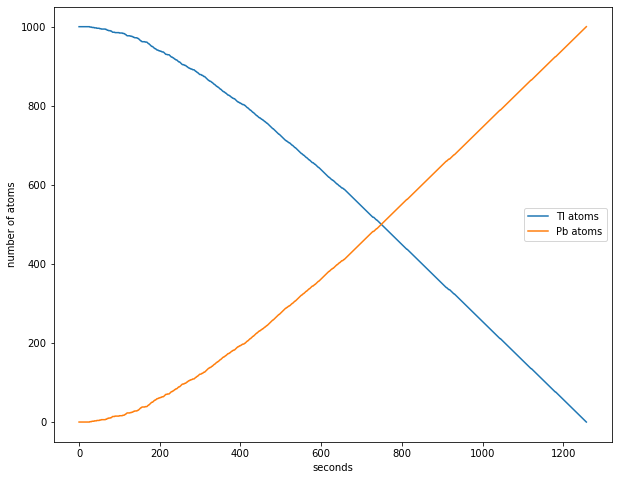

In [52]:
import numpy as np
from matplotlib import pyplot as plt

#Task1

𝜏 = 3.052*60

def prob(t):
    return 1-(2**(-t/𝜏))

Tl = [x for x in range(1000)]
Pb = []
Tl_sizelog = []
Pb_sizelog = []
time = 0
while Tl:
    time += 1
    p = prob(time)
    for i in range(len(Tl)):
        decayed_list =[]
        if np.random.random() <= p:
            decayed_list.append(Tl[i])
    for decayed_elem in decayed_list:
            Pb.append(Tl.pop(Tl.index(decayed_elem)))
    Tl_sizelog.append(len(Tl))
    Pb_sizelog.append(len(Pb))
print("Total time = ",time,"seconds")
plt.figure(figsize=(10,8))
plt.plot(Tl_sizelog, label='Tl atoms')
plt.plot(Pb_sizelog, label='Pb atoms')
plt.legend()
plt.ylabel('number of atoms')
plt.xlabel('seconds')

Text(0.5, 1.0, 'Number of Tl atoms - evolution in time')

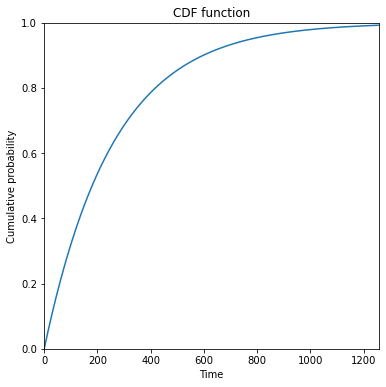

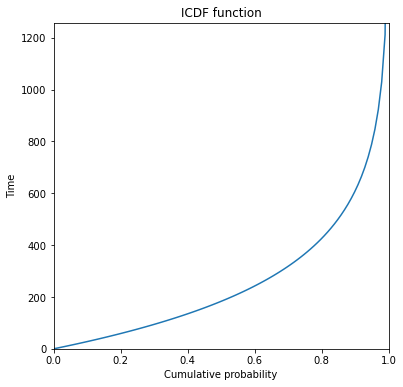

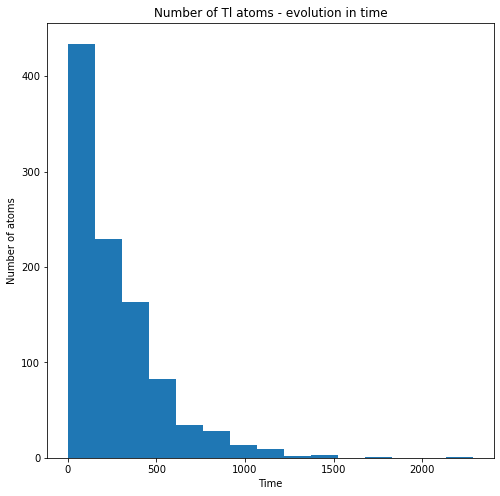

In [70]:
# Task 2

def CDF(t):
    return 1-2**(-t/180)                  #Define the CDF function (not required)

x = np.linspace(0, time, 1000)            #Plot CDF
plt.figure(figsize=(6,6))
plt.title('CDF function')
plt.xlabel('Time')
plt.ylabel('Cumulative probability')
plt.xlim(0,time)
plt.ylim(0,1)
plt.plot(x, CDF(x))

def ICDF(y):                              #Define the ICDF function
    return -np.log(1-y)*𝜏/np.log(2)

x = np.linspace(0, .9999, 100)            #Plot ICDF
plt.figure(figsize=(6,6))
plt.title('ICDF function')
plt.ylabel('Time')
plt.xlabel('Cumulative probability')
plt.ylim(0,time)
plt.xlim(0,1)
plt.plot(x, ICDF(x))

num = ICDF(np.random.uniform(0,1,1000))    #Apply inverse trnasform method 

plt.figure(figsize=(8,8))                  #Plot the result
plt.hist(num,bins=15)
plt.xlabel('Time')
plt.ylabel('Number of atoms')
plt.title('Number of Tl atoms - evolution in time')

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

The value of the integral with Monte Carlo integration is:  1.346
Mean value of  the 50 trials = 1.3475240000000002
Standard error of the 50 trials = 0.0012988596844925177


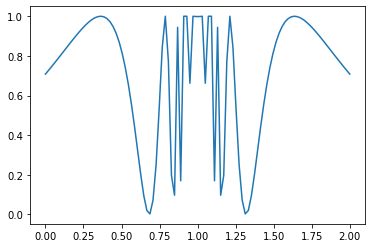

In [93]:
import math

#Task1
def f(x):                          #Define and plot the function
    return np.sin(1/(1-x))**2  
f = np.vectorize(f)
x = np.linspace(0,2,100)
plt.plot(x, f(x))

def hm_integ(f,numiter,a,b,h):      #Hit/miss integral
    hit = 0
    for i in range(numiter):
        x = np.random.uniform(a, b)
        y = np.random.uniform(0, h)
        if y < f(x):
            hit += 1
    integral = (b-a)*h*hit/numiter 
    return integral 

integral = hm_integ(f,10000,0,2,1)                                                   #Integral of the function
print("The value of the integral with Monte Carlo integration is: ", integral)

trials = 50                                                                          #Compute mean and error
integrals = [hm_integ(f,10000,0,2,1) for i in range(0,trials)]
mean = np.mean(integrals)
std = np.std(integrals)
print(f"Mean value of  the {trials} trials = {mean}")
print(f"Standard error of the {trials} trials = {std/np.sqrt(trials)}")

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [113]:
# Task1 

def f(x):
    return np.sqrt(1-(x**2))

def mv_integral(f,numiter,a,b):
    values = []
    for i in range(numiter):
        x = np.random.uniform(a, b)
        values.append(f(x))
    return 4*(b-a)*np.sum(values)/numiter

I = mv_integral(f,10000,0,1)
print("The result of the integral is:", I)

The result of the integral is: 3.1528614863291753


In [82]:
# Task2

def f(x):                                  #Define the 10-D sphere 
    modulo = sum(i**2 for i in x)
    if modulo <=1: 
        return 1
    else: 
        return 0
V = 2**10
count = 0                                 #count samples inside the sphere
numiter = 10000
for i in range(numiter):
    x = np.random.uniform(-1,1,10)
    if f(x)==1:                           # if sample inside the sphere
        count += 1

print("The result of the integral is: ", V*count/numiter)

The result of the integral is:  2.56


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [112]:
def f(x):
    return 1/(np.sqrt(x)*(np.exp(x)+1))

def w(x):
    return 1/np.sqrt(x)

numiter = 10000000
x = np.random.uniform(0,1,numiter)
I = np.sum(f(x)/w(x))*2.0/numiter
print("Result of the integral with importance sampling =", I)

Result of the integral with importance sampling = 0.7597724477501178
